Generates file(s): data/predetermined-3.pkl

Evidence that convergence of added mass in the innermost region is independent of m0 and h. It is only dependent on (h-d) and radial width of each region.

This data is for 2 geometries (wrt h-d and radwidths). Each geometry has one data set varying m0 and one varying h, for a total of 4 data sets.

In [1]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *

In [2]:
def solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 1):
  prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
  mk = prob.m_k
  info = {"h" : h,
          "d" : d,
          "a" : a,
          "region" : region,
          "m0s" : [m0]}
  print(info)
  return merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))

def solve_and_store_m0s(h, d, a, heaving, NMK, m0s, rho, nmk_max, region = 1):
  prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0s[0], rho)
  mks = [prob.m_k]
  for m0 in m0s[1:]:
    prob.change_m0(m0)
    mks.append(prob.m_k)
  info = {"h" : h,
          "d" : d,
          "a" : a,
          "region" : region,
          "m0s" : m0s}
  print(info)
  return merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, m0s, mks))

dim1s = {"h" : lambda data_dict, m0: data_dict["h"],
        "(1/m0)" : lambda data_dict, m0: 1/m0,
        "m0" : lambda data_dict, m0: m0}

dim0s = {"m0h" : lambda data_dict, m0: data_dict["h"] * m0}

In [4]:
file1 = "data/predetermined-3.pkl"
radwidth0, radwidth1, radwidth2 = 2, 1, 2
big_nmk, nmk_max = 200, 150
heaving, NMK, rho = [0, 1, 0], [big_nmk] * 4, 1023

m0s = [0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50]
hs = [31, 35, 40, 50, 75, 100]

def generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2):
  radwidths = [radwidth0, radwidth1, radwidth2]
  hmds = [hmd0, hmd1, hmd2]
  d = [h - hmds[i] for i in range(3)]
  a = [sum(radwidths[:i + 1]) for i in range(3)]
  for i in range(3):
    assert d[i] > 0
    assert radwidths[i] > 0
  return d, a

# hmd0, hmd1, hmd2 = 20, 25, 30
# all_prob_sets = [[], [], [], [], [], [], []]

# h = 40
# d, a = generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2)
# all_prob_sets[0].append(solve_and_store_m0s(h, d, a, heaving, NMK, m0s, rho, nmk_max))
# update_data_file(all_prob_sets, file1)
# print("Finished set 0.")

# m0 = 2
# for h in hs:
#   d, a = generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2)
#   all_prob_sets[1].append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# update_data_file(all_prob_sets, file1)
# print("Finished set 1.")

# hmd0, hmd1, hmd2 = 30, 25, 20
# h = 40
# d, a = generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2)
# all_prob_sets[2].append(solve_and_store_m0s(h, d, a, heaving, NMK, m0s, rho, nmk_max))
# update_data_file(all_prob_sets, file1)
# print("Finished set 2.")

# m0 = 2
# for h in hs:
#   d, a = generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2)
#   all_prob_sets[3].append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# update_data_file(all_prob_sets, file1)
# print("Finished set 3.")

# radwidth0, radwidth1, radwidth2 = 2, 1, 1
# hmd0, hmd1, hmd2 = 20, 25, 30
# hs = [31, 35, 40, 50, 75, 100]
# m0 = 2
# for h in hs:
#   d, a = generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2)
#   all_prob_sets[4].append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# update_data_file(all_prob_sets, file1)
# print("Finished set 4.")

# radwidth0, radwidth1, radwidth2 = 2, 1, 2
# hmd0, hmd1, hmd2 = 20, 25, 26
# hs = [27, 30, 35, 40, 50, 75, 100]
# m0 = 2
# for h in hs:
#   d, a = generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2)
#   all_prob_sets[5].append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# update_data_file(all_prob_sets, file1)
# print("Finished set 5.")

# radwidth0, radwidth1, radwidth2 = 2, 1, 1
# hmd0, hmd1, hmd2 = 20, 25, 30
# m0hs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
# hs = [31, 35, 40, 50, 75, 100]
# for h in hs:
#   m0s = [m0h/h for m0h in m0hs]
#   d, a = generate_d_a(h, radwidth0, radwidth1, radwidth2, hmd0, hmd1, hmd2)
#   all_prob_sets[6].append(solve_and_store_m0s(h, d, a, heaving, NMK, m0s, rho, nmk_max))
# update_data_file(all_prob_sets, file1)
# print("Finished set 6.")


In [69]:
all_prob_sets = open_pkl_file(file1)
for subset in all_prob_sets:
  generate_convergence_data(subset, [0.01, 0.005])
  generate_log_data(subset)

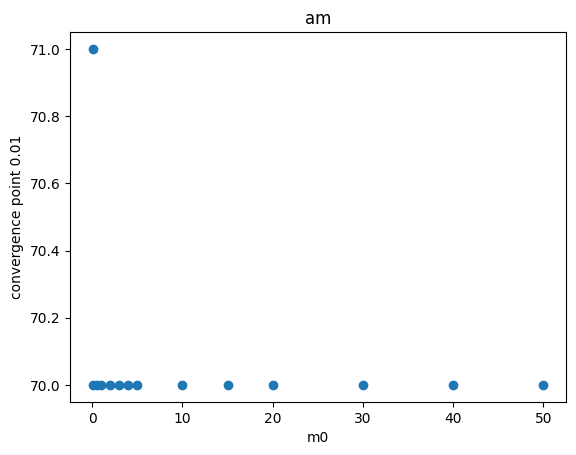

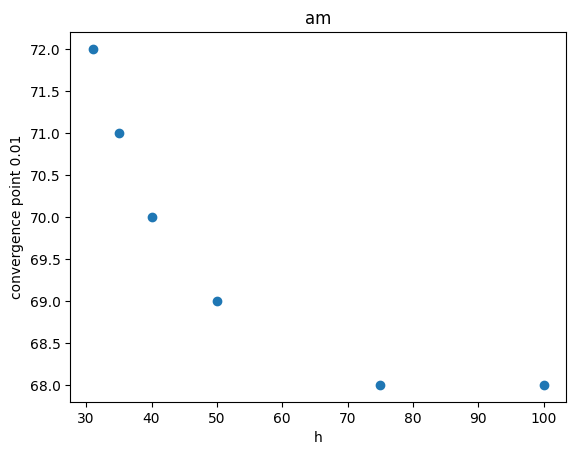

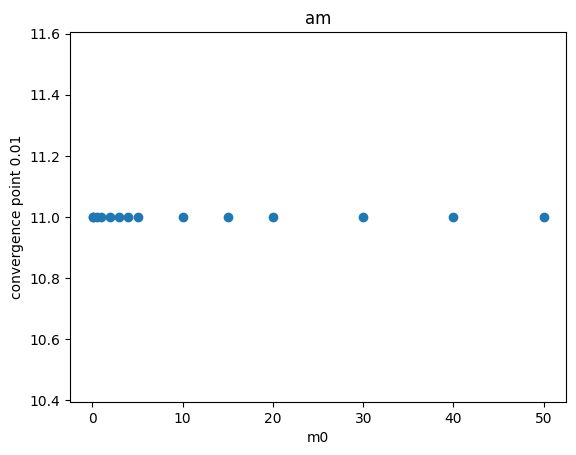

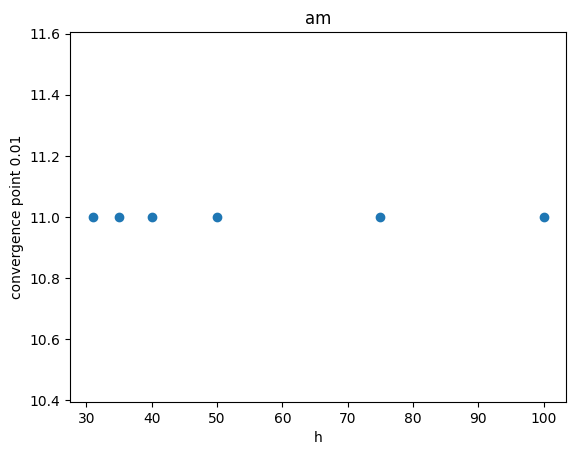

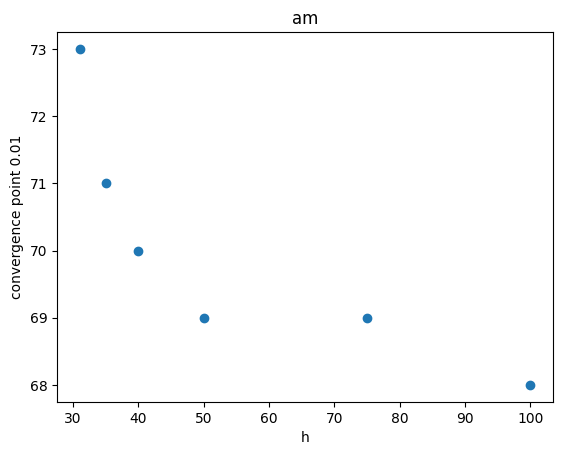

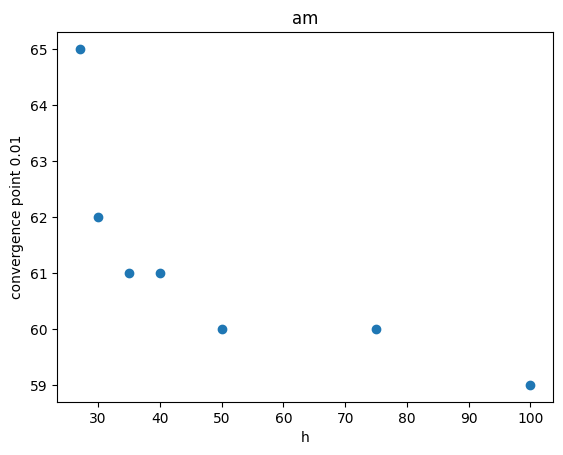

In [55]:
hydro = "am" # mild h dependence (likely (h-d2)/h - like)
plot_hydros_against_1(all_prob_sets[0], hydro, 0.01, dim1s["m0"], xlabel = "m0")
plot_hydros_against_1(all_prob_sets[1], hydro, 0.01, dim1s["h"], xlabel = "h")
plot_hydros_against_1(all_prob_sets[2], hydro, 0.01, dim1s["m0"], xlabel = "m0")
plot_hydros_against_1(all_prob_sets[3], hydro, 0.01, dim1s["h"], xlabel = "h")
plot_hydros_against_1(all_prob_sets[4], hydro, 0.01, dim1s["h"], xlabel = "h")
plot_hydros_against_1(all_prob_sets[5], hydro, 0.01, dim1s["h"], xlabel = "h")

In [70]:
def filter_150s(prob_set, hydro, error):
  output = []
  for prob in prob_set:
    new_dict = prob.copy()
    new_m0s = []
    for m0 in prob["m0s"]:
      if new_dict[m0][f"convergence point {error:.2g} " + hydro] == 150:
        del new_dict[m0]
      else: new_m0s.append(m0)
    new_dict["m0s"] = new_m0s
    output.append(new_dict)
  return output

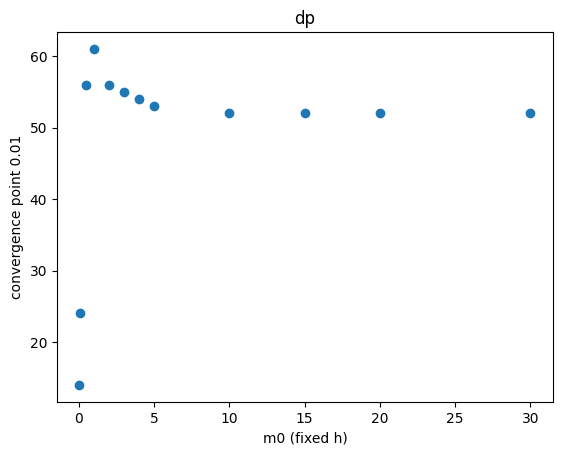

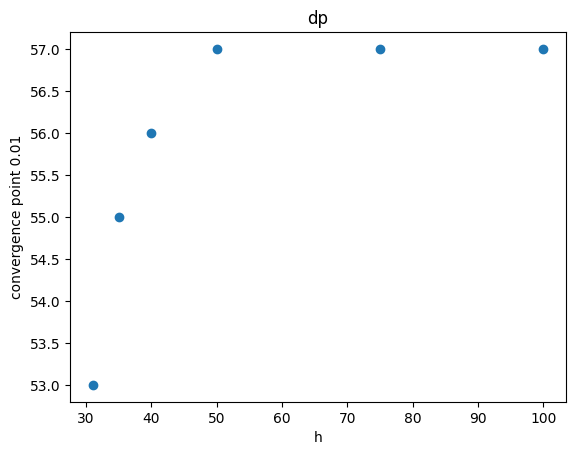

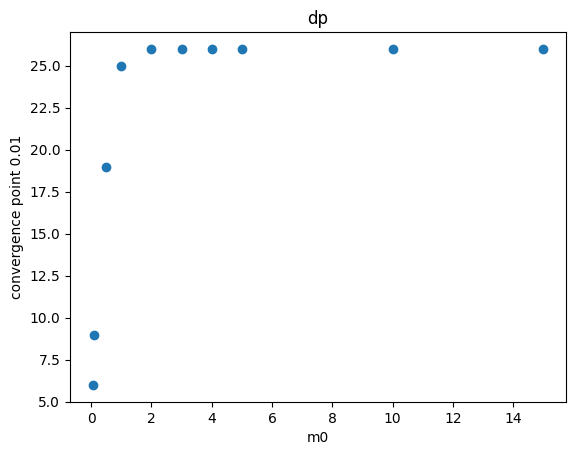

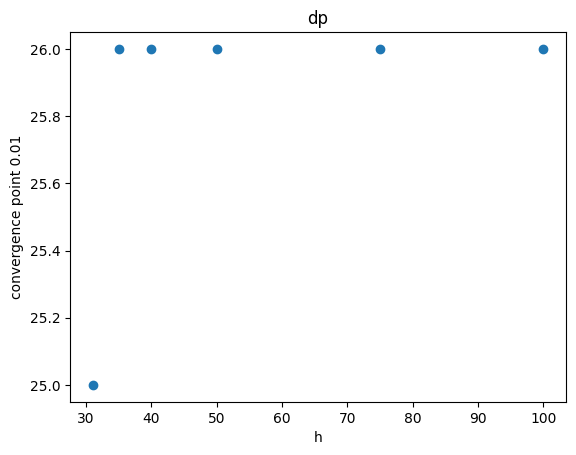

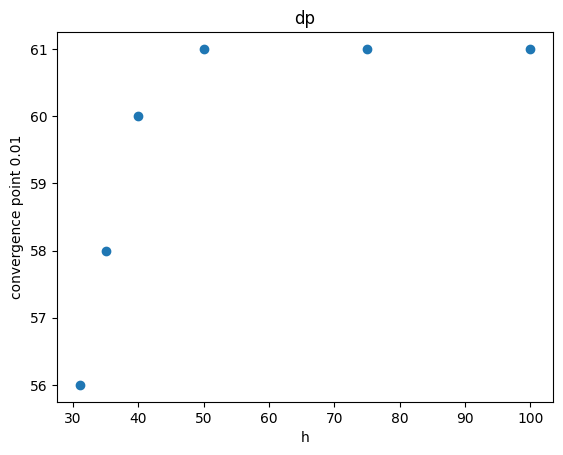

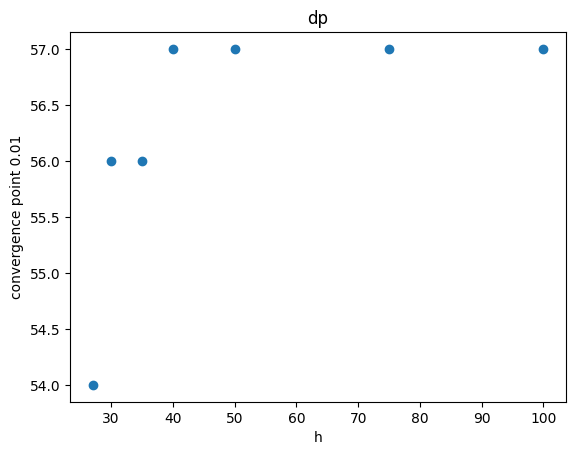

In [77]:
hydro = "dp" # The "unconverged" points at 150 are actually divide-by-0 = nan errors.
plot_hydros_against_1(filter_150s(all_prob_sets[0], hydro, 0.01), hydro, 0.01, dim1s["m0"], xlabel = "m0 (fixed h)")
plot_hydros_against_1(all_prob_sets[1], hydro, 0.01, dim1s["h"], xlabel = "h")
plot_hydros_against_1(filter_150s(all_prob_sets[2], hydro, 0.01), hydro, 0.01, dim1s["m0"], xlabel = "m0")
plot_hydros_against_1(all_prob_sets[3], hydro, 0.01, dim1s["h"], xlabel = "h")
plot_hydros_against_1(all_prob_sets[4], hydro, 0.01, dim1s["h"], xlabel = "h")
plot_hydros_against_1(all_prob_sets[5], hydro, 0.01, dim1s["h"], xlabel = "h")

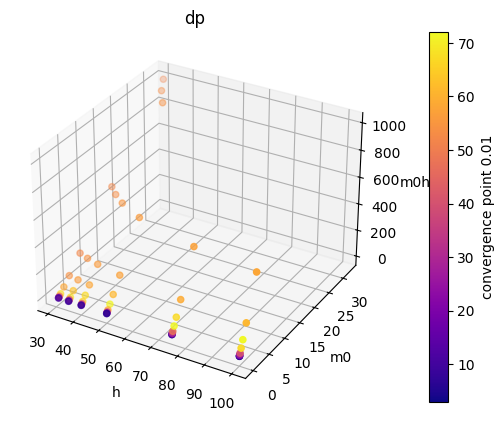

In [76]:
# plot_hydros_against_3(filter_150s(all_prob_sets[6], "dp", 0.01), "dp", 0.01, dim1s["h"], dim0s["m0h"],
#                       lambda cf, m0 : cf[m0]["convergence point 0.01 dp"], "h", "m0h", "cp 0.01 dp")

plot_hydros_against_3(filter_150s(all_prob_sets[6], "dp", 0.01), "dp", 0.01, dim1s["h"], dim1s["m0"], dim0s["m0h"],
                      "h", "m0", "m0h")

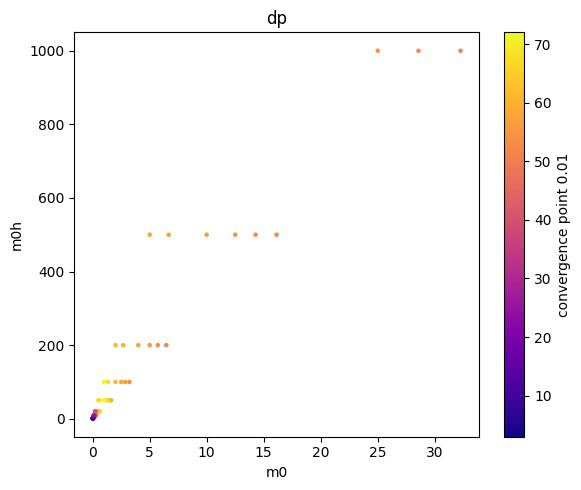

In [74]:
plot_hydros_against_2(filter_150s(all_prob_sets[6], "dp", 0.01), "dp", 0.01, dim1s["m0"], dim0s["m0h"], "m0", "m0h")

In [89]:
import numpy as np

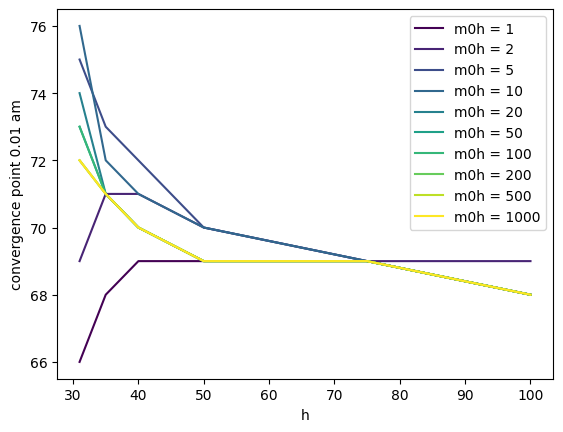

In [93]:
data = filter_150s(all_prob_sets[6], "am", 0.01)
data_as_lsts = subdivide_lst(data, dim0s["m0h"], rtol = 0.01)
colors = color_by_f_value(lambda cf, m0 : np.log(dim0s["m0h"](cf, m0)), [lst[0] for lst in data_as_lsts], cmap = "viridis", all_m0s = True)
for idx, lst in enumerate(data_as_lsts):
  xs = [dim1s["h"](cf, cf["m0s"][0]) for cf in lst]
  ys = [cf[cf["m0s"][0]]["convergence point 0.01 am"] for cf in lst]
  lab = dim0s["m0h"](lst[0], lst[0]["m0s"][0])
  plt.plot(xs, ys, color = colors[idx], label = f"m0h = {lab:.4g}")
plt.legend()
plt.xlabel("h")
plt.ylabel("convergence point 0.01 am")
plt.show()

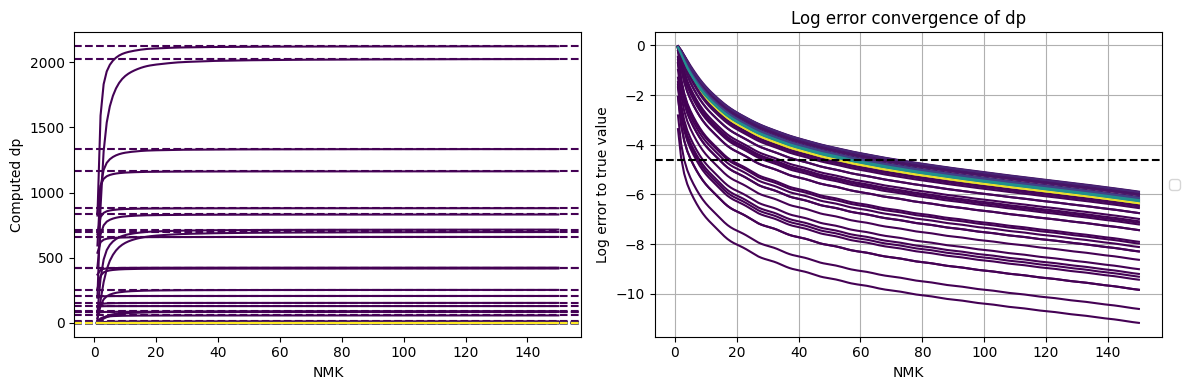

In [80]:
hydro = "dp"
subset = all_prob_sets[6]
formatted_data = many_data_dicts_to_convergence_plot_data(subset, all_m0s = True)
colors = color_by_f_value(dim0s["m0h"], subset, cmap = "viridis", all_m0s = True)
plot_set_convergence_and_log(formatted_data, hydro, colors = colors, show_error = True, trunc = 0)

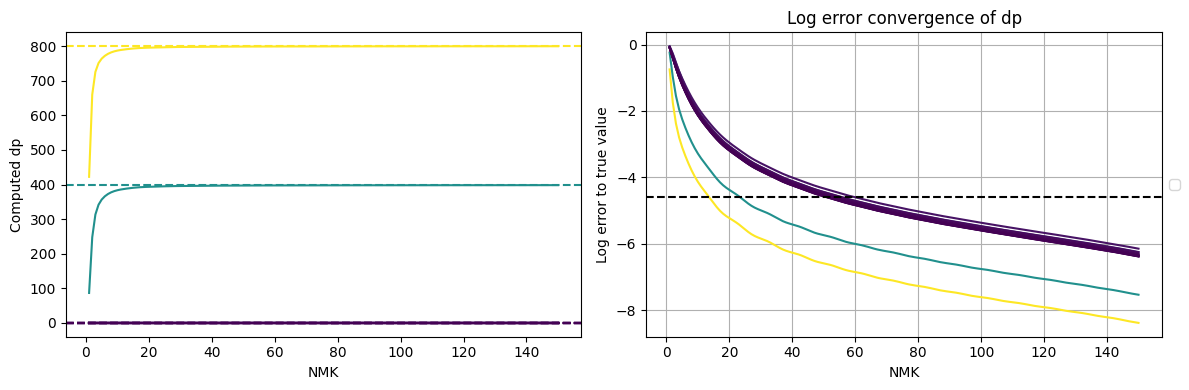

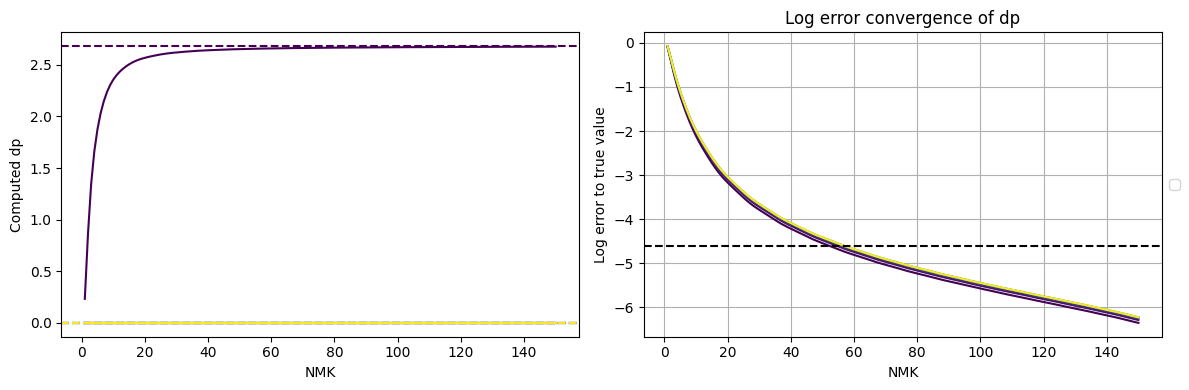

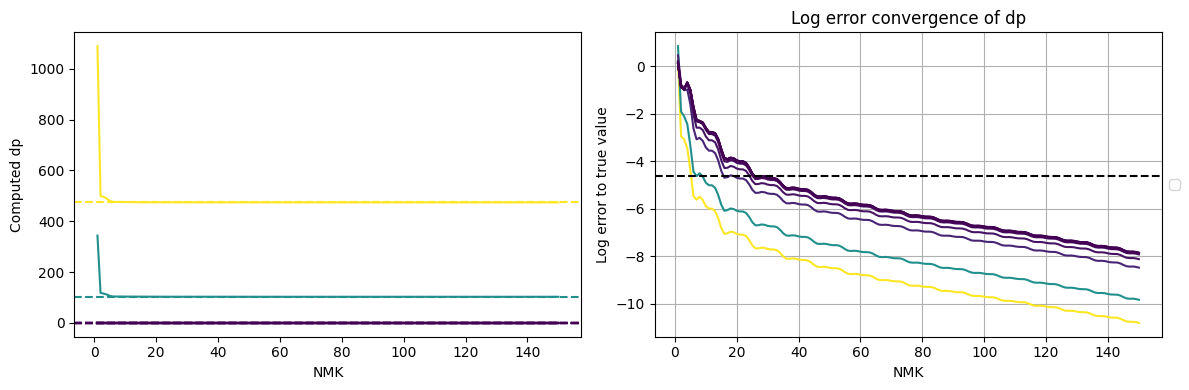

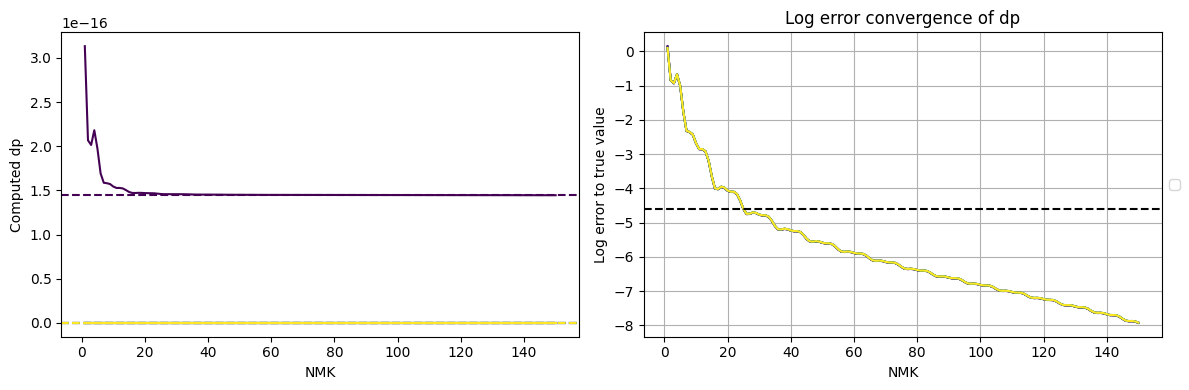

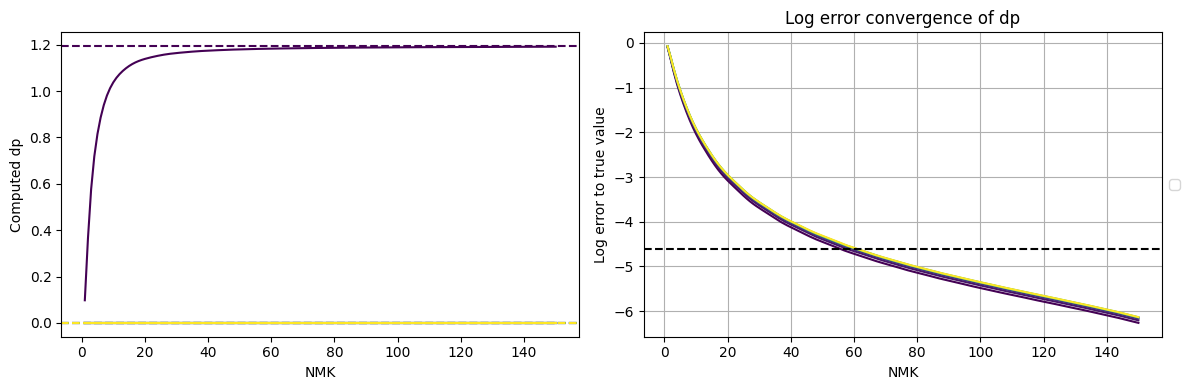

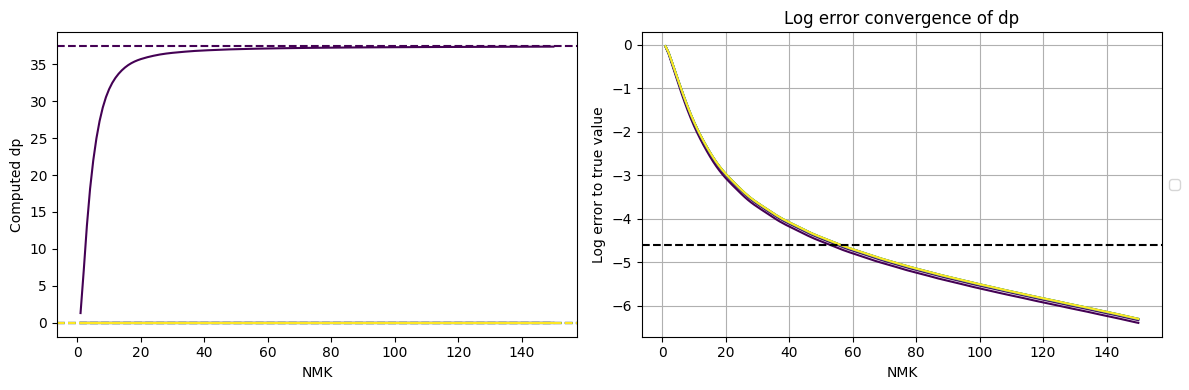

In [38]:
hydro = "dp"
for subset in all_prob_sets:
  formatted_data = many_data_dicts_to_convergence_plot_data(subset, all_m0s = True)
  if len(subset) == 1: f = dim1s["(1/m0)"]
  else: f = dim1s["h"]
  colors = color_by_f_value(f, subset, cmap = "viridis", all_m0s = True)
  plot_set_convergence_and_log(formatted_data, hydro, colors = colors, show_error = True, trunc = 0)